Topic analysis

Now lets analyse a bit the main topics of our data set


Imports

In [9]:
%store -r game_df_cleaned
%store -r swords_df_cleaned

%store -r game_text_cleaned
%store -r swords_text_cleaned

In [14]:
!pip install textacy
!python -m spacy download en_core_web_lg
!pip install seaborn

     -------------------------------------- 400.7/400.7 MB 2.6 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     -------------------------------------- 292.8/292.8 kB 1.5 MB/s eta 0:00:00


In [15]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from collections import Counter #for counting
import seaborn as sns #for visualization
from IPython.display import Markdown, display
plt.style.use('seaborn')
sns.set(font_scale=2)

In [22]:
nlp = spacy.load('en_core_web_lg')

def analyze_topics(text: list):
    doc = nlp(''.join(str(x) for x in text[:15000]))

    topics = []
    for token in doc:
        if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
            topics.append(token)

    topics = [str(x) for x in topics]

    df_nouns = pd.DataFrame(topics, columns=["Topics"])
    df_nouns
    plt.figure(figsize=(7,6))
    sns.countplot(y="Topics",
                 data=df_nouns,
                 order=df_nouns["Topics"].value_counts().iloc[:15].index)
    plt.show()

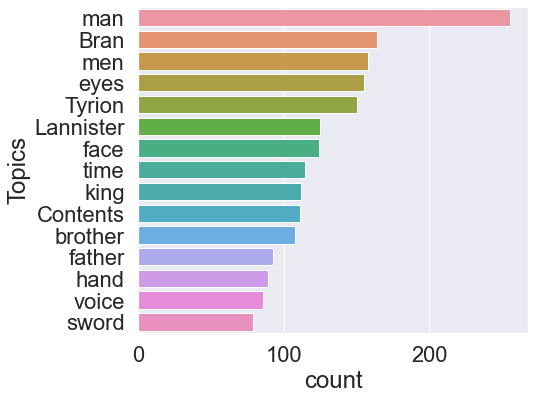

In [23]:
analyze_topics(game_text_cleaned)

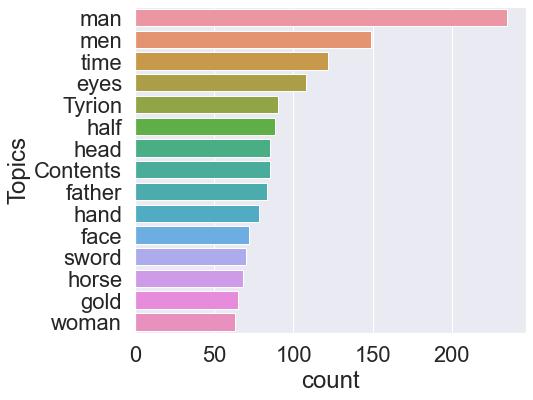

In [24]:
analyze_topics(swords_text_cleaned)

In [35]:
def main_characters(text: list):
    doc = nlp(''.join(str(x) for x in text[:15000]))

    characters = []
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            characters.append(ent.text.strip())

    characters = [str(x) for x in characters]

    df_nouns = pd.DataFrame(characters, columns=["Main Characters"])
    plt.figure(figsize=(7,6))
    sns.countplot(y="Main Characters",
                 data=df_nouns,
                 order=df_nouns["Main Characters"].value_counts().iloc[:10].index)
    plt.show()

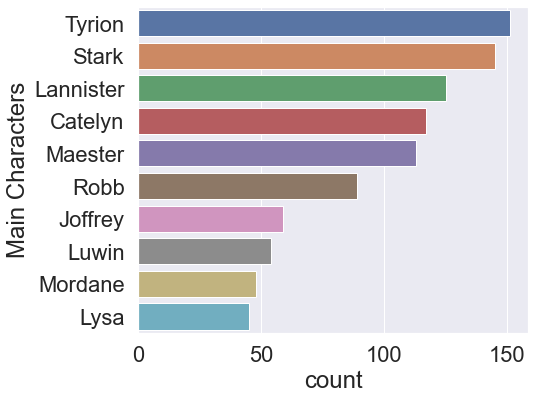

In [36]:
main_characters(game_text_cleaned)

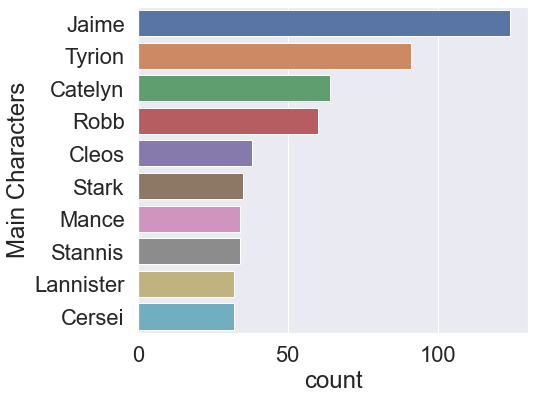

In [37]:
main_characters(swords_text_cleaned)

In [38]:
def time_analysis(text: list):
    doc = nlp(''.join(str(x) for x in text[:15000]))

    time = []
    for ent in doc.ents:
        if ent.label_ in ["DATE"]:
            time.append(ent.text.strip())

    time = [str(x) for x in time]

    df_nouns = pd.DataFrame(time, columns=["Time"])
    plt.figure(figsize=(7,6))
    sns.countplot(y="Time",
                 data=df_nouns,
                 order=df_nouns["Time"].value_counts().iloc[:15].index)
    plt.show()

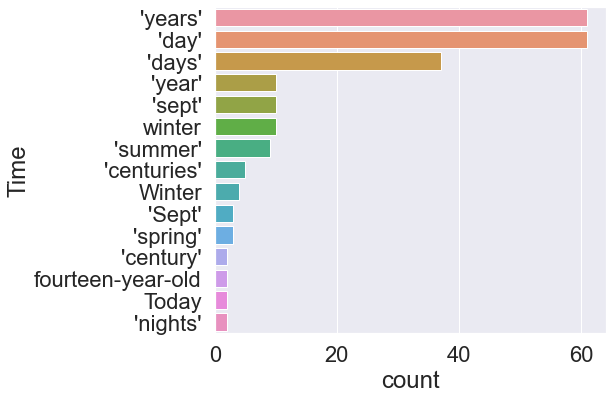

In [39]:
time_analysis(game_text_cleaned)

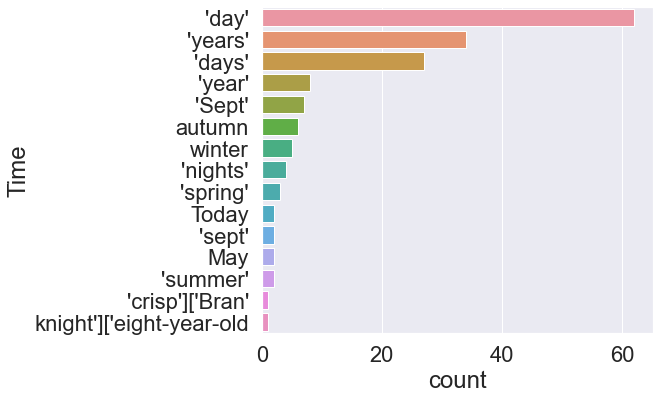

In [40]:
time_analysis(swords_text_cleaned)